# IMDB Movie Review Sentiment Classification with Deep Learning


### Import libraries

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

### Load the IMDB dataset

In [9]:
vocab_size = 20000   # number of unique words to keep
maxlen = 200         # maximum sequence length

(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=vocab_size)

print("Training samples:", len(x_train))
print("Test samples:", len(x_test))

Training samples: 25000
Test samples: 25000


###  Pad sequences (so all reviews are the same length)

In [10]:
x_train_padded = pad_sequences(x_train, maxlen=maxlen, padding="pre", truncating="pre")
x_test_padded = pad_sequences(x_test, maxlen=maxlen, padding="pre", truncating="pre")

print("Padded shape:", x_train_padded.shape, x_test_padded.shape)

Padded shape: (25000, 200) (25000, 200)


###  Build the deep learning model

In [11]:
embedding_dim = 128

model = keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    layers.Bidirectional(layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2)),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [12]:
history = model.fit(
    x_train_padded, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=128,
    verbose=1
)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 303s 2s/step - accuracy: 0.7391 - loss: 0.5091 - val_accuracy: 0.8256 - val_loss: 0.3897
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 343s 2s/step - accuracy: 0.8778 - loss: 0.3167 - val_accuracy: 0.8412 - val_loss: 0.3742
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 368s 2s/step - accuracy: 0.9060 - loss: 0.2497 - val_accuracy: 0.8186 - val_loss: 0.4049
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 417s 3s/step - accuracy: 0.9193 - loss: 0.2141 - val_accuracy: 0.8366 - val_loss: 0.4240
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 357s 2s/step - accuracy: 0.9385 - loss: 0.1708 - val_accuracy: 0.8420 - val_loss: 0.5014


### Evaluate the model

In [13]:
loss, acc = model.evaluate(x_test_padded, y_test, verbose=2)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {acc:.4f}")

782/782 - 49s - 62ms/step - accuracy: 0.8334 - loss: 0.5127
Test Loss: 0.5127, Test Accuracy: 0.8334


### Plot training history

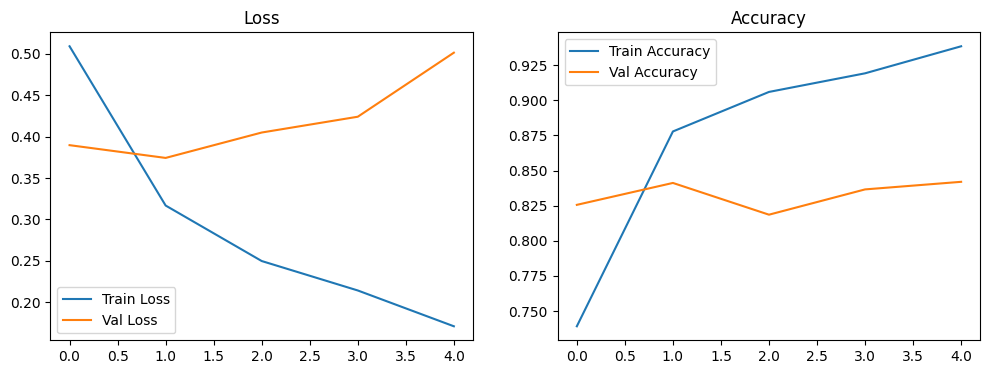

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

plt.show()

###  Make a prediction on a custom review

In [15]:
word_index = keras.datasets.imdb.get_word_index()

def text_to_sequence(text, vocab_size=vocab_size):
    text = text.lower().split()
    seq = []
    for word in text:
        idx = word_index.get(word)
        if idx is not None and idx < vocab_size:
            seq.append(idx + 3)  # keras offset
        else:
            seq.append(2)  # <UNK>
    return seq

sample_review = "I loved this movie, it was amazing and the acting was great"
seq = text_to_sequence(sample_review)
seq_padded = pad_sequences([seq], maxlen=maxlen)

prediction = model.predict(seq_padded)[0][0]
print("Prediction (positive sentiment probability):", prediction)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 4s 2us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step
Prediction (positive sentiment probability): 0.99553275
